ORIGINAL DATA SOURCE:

The dataset contains 2 folders - Infected - Uninfected

And a total of 27,558 images.

Acknowledgements This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/

In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

ADDING THE DATASET FROM THE DATASOURCE

In [8]:
my_data_dir = 'C:\\Users\\Elio\\Desktop\\Tensorflow2.0\\TF_2_Notebooks_and_Data\\04-CNNs\\cell_images'

In [10]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir)

['test', 'train']

In [12]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [14]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [16]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [18]:
os.listdir(train_path+'\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [20]:
#DISPLAYING IMAGE OF INFECTED CELL
para_cell = train_path+'\\parasitized'+'\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [22]:
para_img= imread(para_cell)

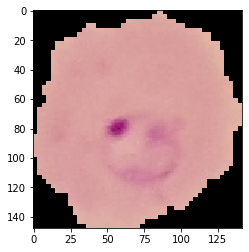

In [24]:
plt.imshow(para_img)

In [26]:
para_img.shape

(148, 142, 3)

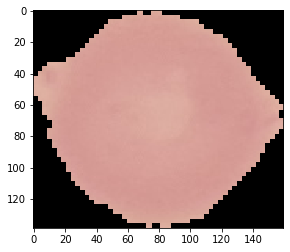

In [28]:
#DISPLAYING IMAGE FOR UNINFECTED CELL
unifected_cell_path = train_path+'\\uninfected\\'+os.listdir(train_path+'\\uninfected')[0]
unifected_cell = imread(unifected_cell_path)
plt.imshow(unifected_cell)

--------------------------------------------------------------------------------------
CHECKING THE NUMBER OF IMAGES IN THE DATASET
-------------------------------------------------------------------------------

In [30]:
len(os.listdir(train_path+'\\parasitized'))

12480

In [32]:
len(os.listdir(train_path+'\\uninfected'))

12480

---------------------------------------------------------------------------------------------------
CHECKING FOR THE AVERAGE DIMENSION OF THESE IMAGES
-------------------------------------------------------------------------------------------

In [34]:
unifected_cell.shape

(139, 160, 3)

In [36]:
para_img.shape

(148, 142, 3)

In [38]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

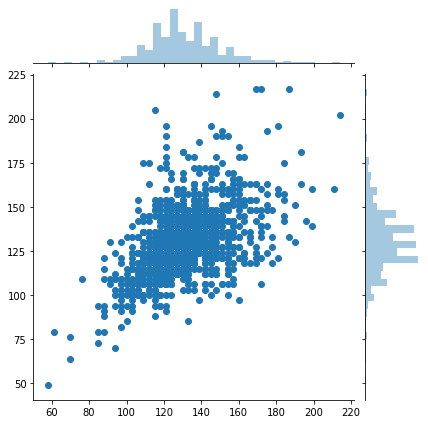

In [40]:
sns.jointplot(dim1,dim2)

In [43]:
dim1, dim2

([118,
  172,
  130,
  163,
  172,
  139,
  151,
  160,
  145,
  127,
  121,
  154,
  145,
  127,
  154,
  151,
  148,
  130,
  160,
  136,
  139,
  190,
  127,
  133,
  136,
  124,
  151,
  151,
  151,
  160,
  118,
  154,
  154,
  121,
  127,
  118,
  130,
  124,
  163,
  88,
  139,
  127,
  121,
  139,
  166,
  133,
  124,
  154,
  139,
  127,
  124,
  136,
  166,
  133,
  145,
  157,
  181,
  148,
  112,
  124,
  112,
  106,
  121,
  148,
  148,
  112,
  121,
  148,
  97,
  112,
  142,
  118,
  130,
  151,
  133,
  136,
  115,
  145,
  115,
  142,
  136,
  130,
  142,
  124,
  142,
  136,
  166,
  148,
  136,
  142,
  133,
  130,
  139,
  124,
  139,
  121,
  130,
  142,
  133,
  118,
  157,
  127,
  109,
  112,
  139,
  142,
  142,
  112,
  118,
  100,
  127,
  145,
  136,
  160,
  187,
  130,
  130,
  157,
  130,
  130,
  151,
  175,
  145,
  136,
  157,
  133,
  127,
  154,
  133,
  151,
  130,
  136,
  160,
  130,
  139,
  145,
  145,
  145,
  154,
  133,
  160,
  142,
  157,
 

In [45]:
np.mean(dim1)

130.92538461538462

In [65]:
np.mean(dim2)

130.75

In [66]:
image_shape = (130, 130, 3)

-------------------------------------------------------------------------------------------------
Preparing the Data for the model
-----------------------------------------------------------------------------------------
There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

---------------------------------------------------------------------------------------------------
Image Manipulation
-------------------------------------------------------------------------------------------
Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set may not contain. We can use the ImageDataGenerator to do this.


In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [51]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [53]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

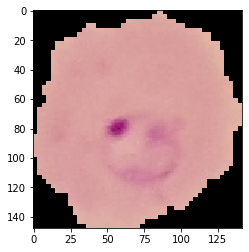

In [55]:
plt.imshow(para_img)

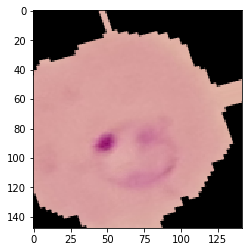

In [57]:
plt.imshow(image_gen.random_transform(para_img))

In [59]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [61]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


-------------------------------------------------------------------------------------------------------
CREATING A MODEL
-----------------------------------------------------------------------------------------------

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [68]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, since its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

--------------------------------------------------------------------------------------------------
Early Stopping
-------------------------------------------------------------------------------------------


In [73]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

-------------------------------------------------------------------------------------------------------
Training the Model
-----------------------------------------------------------------------------------------------

In [75]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module keras_preprocessing.image.image_data_generator:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest') method of tensorflow.python.keras.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    # Arguments
        directory: string, path to the target directory.
            It should contain one subdirectory per class.
            Any PNG, JPG, BMP, PPM or TIF images
            inside each of the subdirectories directory tree
            will be included in the generator.
            See [this script](
            https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
            for more details.
        target_size: Tuple of integers `(height, width

In [77]:
batch_size = 16

In [79]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [81]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [83]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [85]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [87]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 449s 288ms/step - loss: 0.1474 - accuracy: 0.9518 - val_loss: 0.1618 - val_accuracy: 0.9469
Epoch 2/20
1560/1560 [==============================] - 457s 293ms/step - loss: 0.1513 - accuracy: 0.9514 - val_loss: 0.1467 - val_accuracy: 0.9496
Epoch 3/20
1560/1560 [==============================] - 451s 289ms/step - loss: 0.1511 - accuracy: 0.9518 - val_loss: 0.1584 - val_accuracy: 0.9415
Epoch 4/20
1560/1560 [==============================] - 488s 313ms/step - loss: 0.1490 - accuracy: 0.9524 - val_loss: 0.1459 - val_accuracy: 0.9512
Epoch 5/20
1560/1560 [==============================] - 448s 287ms/step - loss: 0.1443 - accuracy: 0.9537 - val_loss: 0.1624 - val_accuracy: 0.9462
Epoch 6/20
1560/1560 [==============================] - 454s 291ms/step - loss: 0.1461 - accuracy: 0.9532 - val_loss: 0.1448 - val_accuracy: 0.9519
Epoch 7/20
1560/1560 [==============================] - 448s 287ms/step - loss: 0.1452 - accuracy: 0.9533 - val_

In [ ]:
from tensorflow.keras.models import load_model
model.save('malaria_detector.h5')


In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
model.metrics_names